<a href="https://colab.research.google.com/github/diptoromeo/GCN-Cora-Data-Classification/blob/main/Cora_GCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graph Convolution Networks based Cora dataset Implemantation
********************************************************************************

* First, explain the graph input method by below Equation and Numpy with python.
* Second, dataset preprocessing and spleting to train and testing with GCn model.
* Finally, We train the GCN model and evaluate the model with Cora dataset.


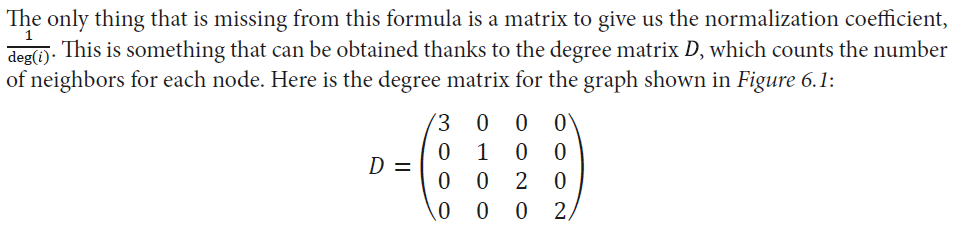




In [1]:
import numpy as np

D = np.array([
[3, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 2, 0],
[0, 0, 0, 2]
])

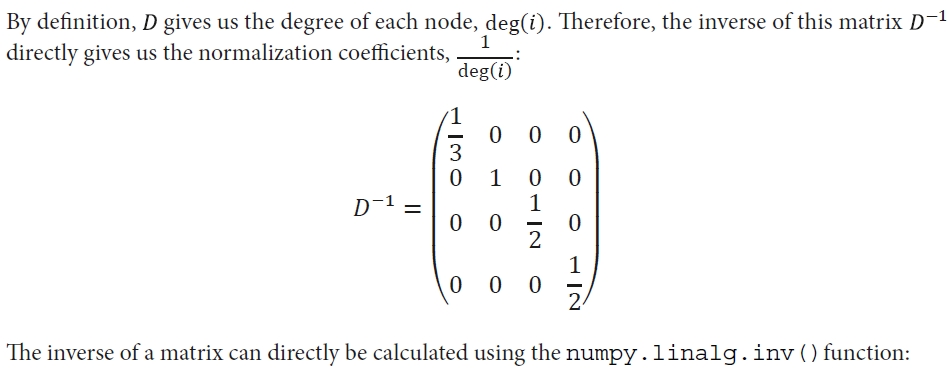

#Code explain

1.This line calculates the inverse of a matrix D using NumPy's linear algebra module (np.linalg). The inv() function specifically calculates the multiplicative inverse of a matrix.

In [2]:
print(np.linalg.inv(D))

[[0.33333333 0.         0.         0.        ]
 [0.         1.         0.         0.        ]
 [0.         0.         0.5        0.        ]
 [0.         0.         0.         0.5       ]]


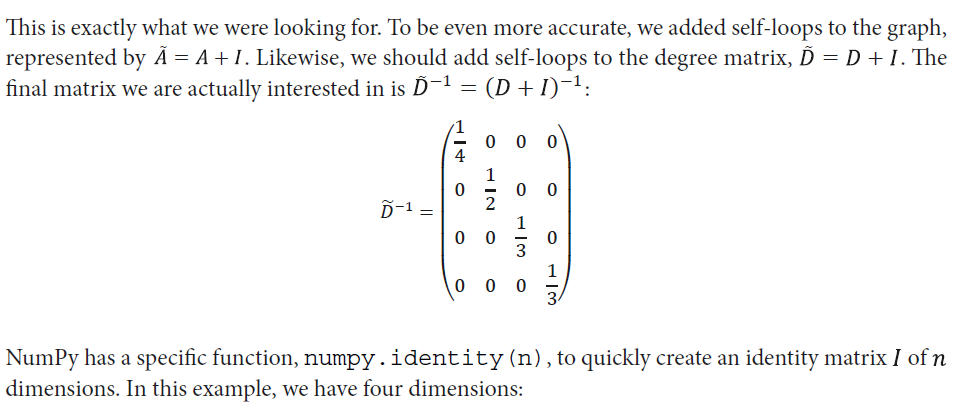

# code explain
1. np.identity(4): This function np.identity() creates a 4x4 identity matrix. An identity matrix is a square matrix with ones on the diagonal and zeros elsewhere. In this case, np.identity(4) creates a 4x4 identity matrix.

2. D + np.identity(4): This part of the code adds the identity matrix (4x4) to the matrix D. This operation is possible because both matrices have the same dimensions.

3. np.linalg.inv(...): This part calculates the inverse of the matrix resulting from the addition of D and the identity matrix.

In [3]:
print(np.linalg.inv(D + np.identity(4)))

[[0.25       0.         0.         0.        ]
 [0.         0.5        0.         0.        ]
 [0.         0.         0.33333333 0.        ]
 [0.         0.         0.         0.33333333]]


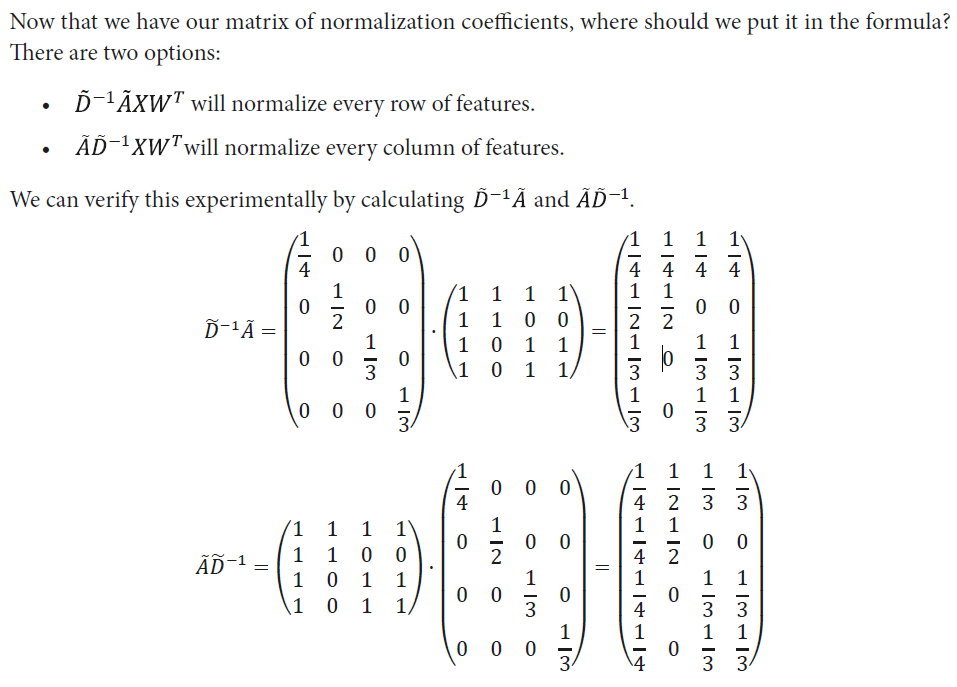

In [4]:
A = np.array([
[1, 1, 1, 1],
[1, 1, 0, 0],
[1, 0, 1, 1],
[1, 0, 1, 1]
])

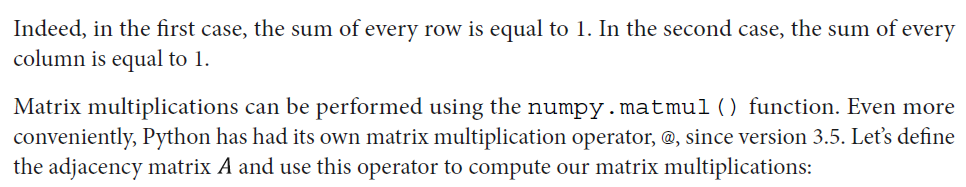

#Code explain
1. np.identity(4): This function np.identity() creates a 4x4 identity matrix. An identity matrix is a square matrix with ones on the diagonal and zeros elsewhere. In this case, np.identity(4) creates a 4x4 identity matrix.
2. D + np.identity(4): This part of the code adds the identity matrix (4x4) to the matrix D. This operation is possible because both matrices have the same dimensions.
3. np.linalg.inv(...): This part calculates the inverse of the matrix resulting from the addition of D and the identity matrix.
4. @: This is the matrix multiplication operator in Python, introduced in Python 3.5 for matrix multiplication. It computes the dot product of two arrays.
5. A: This is another matrix.


In [5]:
print(np.linalg.inv(D + np.identity(4)) @ A)

[[0.25       0.25       0.25       0.25      ]
 [0.5        0.5        0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333]
 [0.33333333 0.         0.33333333 0.33333333]]


# Code explain
1. np.identity(4): This function np.identity() creates a 4x4 identity matrix. An identity matrix is a square matrix with ones on the diagonal and zeros elsewhere. In this case, np.identity(4) creates a 4x4 identity matrix.
2. D + np.identity(4): This part of the code adds the identity matrix (4x4) to the matrix D. This operation is possible because both matrices have the same dimensions.
3. np.linalg.inv(...): This part calculates the inverse of the matrix resulting from the addition of D and the identity matrix.
4. @: This is the matrix multiplication operator in Python, which computes the dot product of two arrays.
5. A: This is another matrix.

In [6]:
print(A @ np.linalg.inv(D + np.identity(4)))

[[0.25       0.5        0.33333333 0.33333333]
 [0.25       0.5        0.         0.        ]
 [0.25       0.         0.33333333 0.33333333]
 [0.25       0.         0.33333333 0.33333333]]


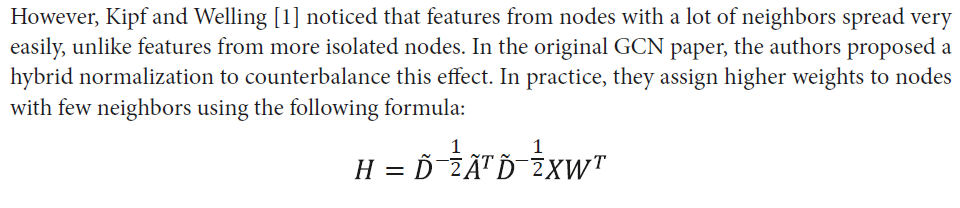

In [7]:
print((np.linalg.inv(D + np.identity(4)) @ A) * (A @ np.linalg.inv(D + np.identity(4))))

[[0.0625     0.125      0.08333333 0.08333333]
 [0.125      0.25       0.         0.        ]
 [0.08333333 0.         0.11111111 0.11111111]
 [0.08333333 0.         0.11111111 0.11111111]]


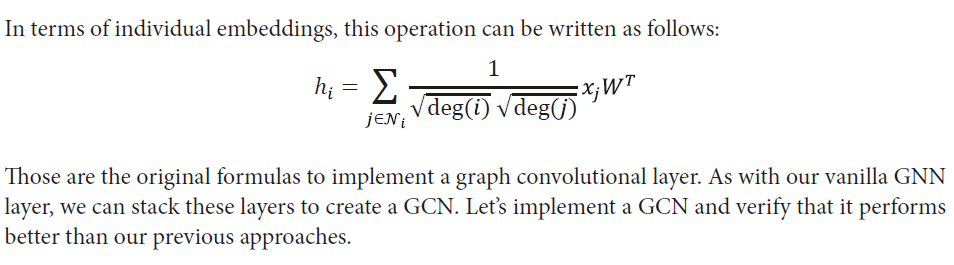

In [8]:
!pip install torch_geometric
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manyl

1. We import the Planetoid class from PyTorch Geometric. To visualize the node degrees, we
also import matplotlib and two additional classes: degree to get the number of neighbors
of each node and Counter to count the number of nodes for each degree:

In [9]:
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import degree
from collections import Counter
import matplotlib.pyplot as plt

2. The Cora dataset is imported and its graph is stored in data:

* data = dataset[0] : slicing 을 통해 그래프가 아닌 노드 하나를 가져옵니다.


In [10]:
dataset = Planetoid(root=" . ", name='Cora')
data = dataset[0]

Processing...
Done!


* Cora() : 데이터셋 전체가 하나의 그래프
* num_classes : 클래스 수 (그래프가 아니라 노드임을 알 수 있음)
* num_node_features : 1433개의 노드특성

***************************************************************
* x=[2708, 1433] -> 총 2708개의 노드와 1433개의 노드 특성
* edge_index=[2, 10556] -> 총 5278개 엣지
* y=[2708] -> 그패프 레벨 타겟

***************************************************************
* node : 확진자
* edge : 접촉 관계를 나타냄
* node_features : 사람의 특징(연령, 성별…)
* edge_features : 접촉 시 상황(접촉 장소의 특징, 접촉 시 주변 사람의 수, 몇 차 감염인지…)

In [11]:
print('num of classes:', dataset.num_classes)
print('num of Nodes:', dataset.num_node_features)
print(data)

num of classes: 7
num of Nodes: 1433
Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


* train_mask : 학습하기 위해 사용하는 노드들을 가리킴
* val_mask : 검증 시 사용하는 노드들을 가리킴
* test_mask : 테스트 시 사용하는 노드들을 가리킴

In [12]:
print("num of train_mask:", data.train_mask.sum().item())
print("num of valid_mask:", data.val_mask.sum().item())
print("num of test_mask:", data.test_mask.sum().item())

num of train_mask: 140
num of valid_mask: 500
num of test_mask: 1000


3. We compute the number of neighbors of each node in the graph:

In [13]:
degrees = degree(data.edge_index[0]).numpy()
print(degrees)
print('degrees len:', len(degrees))

[3. 3. 5. ... 1. 4. 4.]
degrees len: 2708


4. To produce a more natural visualization, we count the number of nodes for each degree:

In [14]:
numbers = Counter(degrees)
print("Numbers of degrees:", numbers)

Numbers of degrees: Counter({2.0: 583, 3.0: 553, 1.0: 485, 4.0: 389, 5.0: 281, 6.0: 131, 7.0: 82, 8.0: 57, 10.0: 26, 9.0: 25, 12.0: 18, 11.0: 14, 17.0: 8, 16.0: 7, 14.0: 6, 15.0: 6, 19.0: 5, 13.0: 5, 21.0: 3, 18.0: 3, 23.0: 3, 32.0: 2, 30.0: 2, 36.0: 1, 78.0: 1, 33.0: 1, 29.0: 1, 34.0: 1, 26.0: 1, 168.0: 1, 22.0: 1, 42.0: 1, 74.0: 1, 44.0: 1, 31.0: 1, 65.0: 1, 40.0: 1})


5. Let’s plot this result using a bar plot:

<BarContainer object of 37 artists>

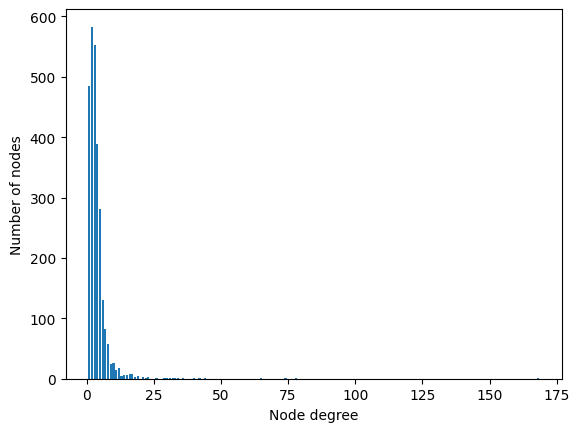

In [15]:
fig, ax = plt.subplots()
ax.set_xlabel('Node degree')
ax.set_ylabel('Number of nodes')
plt.bar(numbers.keys(), numbers.values())

In [16]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

In [17]:
def accuracy(pred_y, y):
  return ((pred_y == y).sum() / len(y)).item()

In [24]:
class GCN(torch.nn.Module):
  """Graph Convolutional Network"""
  def __init__(self, dim_in, dim_h, dim_out): # dim_in: input dimention, dim_h: hidden dimention, dim_out: output dimention.
    super().__init__()
    self.gcn1 = GCNConv(dim_in, dim_h) # First layer of GCN.
    self.gcn2 = GCNConv(dim_h, dim_out) # Second layer of GCN.

  # The forward pass of the neural network.
  def forward(self, x, edge_index): # x is input feature, and edge_index is edge indices.
    h = self.gcn1(x, edge_index) # Producing intermediate node representations 'h'.
    h = torch.relu(h)
    h = self.gcn2(h, edge_index)
    return F.log_softmax(h, dim=1) # The softmax function along the second dimension (dim=1) of the final node representations h,
                                   # and returns the log probabilities.

  def fit(self, data, epochs):
    criterion = torch.nn.CrossEntropyLoss() # Using the loss function.
    optimizer = torch.optim.Adam(self.parameters(), lr=0.01, weight_decay=5e-4) # Weight decay는 모델의 weight의 제곱합을 패널티 텀으로 주어 (=제약을 걸어) loss를 최소화 하는 것을 말한다.
    self.train()

    for epoch in range(epochs+1):
      optimizer.zero_grad()  # Clears the gradients of all optimized parameters.
      out = self(data.x, data.edge_index)  # Performs a forward pass through the model to obtain the output predictions.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Computes the loss between the predicted output and the ground truth labels, only considering the training data.
      acc = accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])  # Calculates
      optimizer.step() # Updates the parameters of the model based on the computed gradients.
      if(epoch % 20 == 0):
        val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
        val_acc = accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask]) # argmax(....)the maximum value along a specified axis in an array.
        print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | Val Acc: {val_acc*100:.2f}%')

  @torch.no_grad() # #This decorator temporarily disables gradient calculation, which can reduce memory usage and speed up computations during inference.
  def test(self, data):
    self.eval() #This line sets the model to evaluation mode.
    out = self(data.x, data.edge_index) # Performs a forward pass through the model to obtain the output predictions.

    # Calculates the accuracy of the model predictions on the test data.
    # It compares the predicted labels (obtained by taking the index of the maximum value along dimension 1 of out) with the ground truth labels, only considering the test data
    acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
    return acc # Finally, the method returns the accuracy of the model on the test data.

In [25]:
gcn = GCN(dataset.num_features, 16, dataset.num_classes)
print(gcn)
gcn.fit(data, epochs=100)

GCN(
  (gcn1): GCNConv(1433, 16)
  (gcn2): GCNConv(16, 7)
)
Epoch   0 | Train Loss: 1.943 | Train Acc: 12.86% | Val Loss: 1.93 | Val Acc: 19.40%
Epoch  20 | Train Loss: 1.943 | Train Acc: 12.86% | Val Loss: 1.93 | Val Acc: 19.40%
Epoch  40 | Train Loss: 1.943 | Train Acc: 12.86% | Val Loss: 1.93 | Val Acc: 19.40%
Epoch  60 | Train Loss: 1.943 | Train Acc: 12.86% | Val Loss: 1.93 | Val Acc: 19.40%
Epoch  80 | Train Loss: 1.943 | Train Acc: 12.86% | Val Loss: 1.93 | Val Acc: 19.40%
Epoch 100 | Train Loss: 1.943 | Train Acc: 12.86% | Val Loss: 1.93 | Val Acc: 19.40%


In [26]:
acc = gcn.test(data)
print(f'GCN test accuracy: {acc*100:.2f}%')

GCN test accuracy: 16.80%


In [27]:
# Prediction
gcn.eval()
with torch.no_grad():
    predictions = gcn(data.x, data.edge_index)
    _, predicted_classes = predictions.max(dim=1)

print(predicted_classes)

tensor([5, 5, 4,  ..., 5, 4, 4])
